# Projet Machine Learning

## Importation des modules et des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score, make_scorer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

In [2]:
pd.set_option('display.max_row', None)  # permet d'afficher les dataframes sans restrictions sur les lignes
pd.set_option('display.max_columns', None)  # permet d'afficher les dataframes sans restrictions sur les colonnes

In [ ]:
data_features_train = pd.read_csv('X_train_G3tdtEn.csv')
data_target_train = pd.read_csv('Y_train_2_XPXJDyy.csv')
data_features_test = pd.read_csv('X_test_8skS2ey.csv')

## Visualisation des données

In [4]:
df = data_features_train.copy()

In [5]:
print("Le dataframe contient", df.shape[0], 'lignes et', df.shape[1], 'colonnes.')

Le dataframe contient 92790 lignes et 146 colonnes.


In [6]:
df.head()

,ID,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,cash_price7,cash_price8,cash_price9,cash_price10,cash_price11,cash_price12,cash_price13,cash_price14,cash_price15,cash_price16,cash_price17,cash_price18,cash_price19,cash_price20,cash_price21,cash_price22,cash_price23,cash_price24,make1,make2,make3,make4,make5,make6,make7,make8,make9,make10,make11,make12,make13,make14,make15,make16,make17,make18,make19,make20,make21,make22,make23,make24,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16,model17,model18,model19,model20,model21,model22,model23,model24,goods_code1,goods_code2,goods_code3,goods_code4,goods_code5,goods_code6,goods_code7,goods_code8,goods_code9,goods_code10,goods_code11,goods_code12,goods_code13,goods_code14,goods_code15,goods_code16,goods_code17,goods_code18,goods_code19,goods_code20,goods_code21,goods_code22,goods_code23,goods_code24,Nbr_of_prod_purchas1,Nbr_of_prod_purchas2,Nbr_of_prod_purchas3,Nbr_of_prod_purchas4,Nbr_of_prod_purchas5,Nbr_of_prod_purchas6,Nbr_of_prod_purchas7,Nbr_of_prod_purchas8,Nbr_of_prod_purchas9,Nbr_of_prod_purchas10,Nbr_of_prod_purchas11,Nbr_of_prod_purchas12,Nbr_of_prod_purchas13,Nbr_of_prod_purchas14,Nbr_of_prod_purchas15,Nbr_of_prod_purchas16,Nbr_of_prod_purchas17,Nbr_of_prod_purchas18,Nbr_of_prod_purchas19,Nbr_of_prod_purchas20,Nbr_of_prod_purchas21,Nbr_of_prod_purchas22,Nbr_of_prod_purchas23,Nbr_of_prod_purchas24,Nb_of_items
0,85517,COMPUTERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239246776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,51113,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE WATCH SERIES 6 GPS 44MM SPACE GREY ALUMI...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239001518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,83008,TELEVISIONS HOME CINEMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMSUNG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SAMSUNG QE75Q70A 2021 QLED HDR 4K ULTRA HD SMA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239842093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,78712,COMPUTERS,COMPUTER PERIPHERALS ACCESSORIES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APPLE,APPLE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020 APPLE IPAD AIR 10 9 A14 

<Axes: >

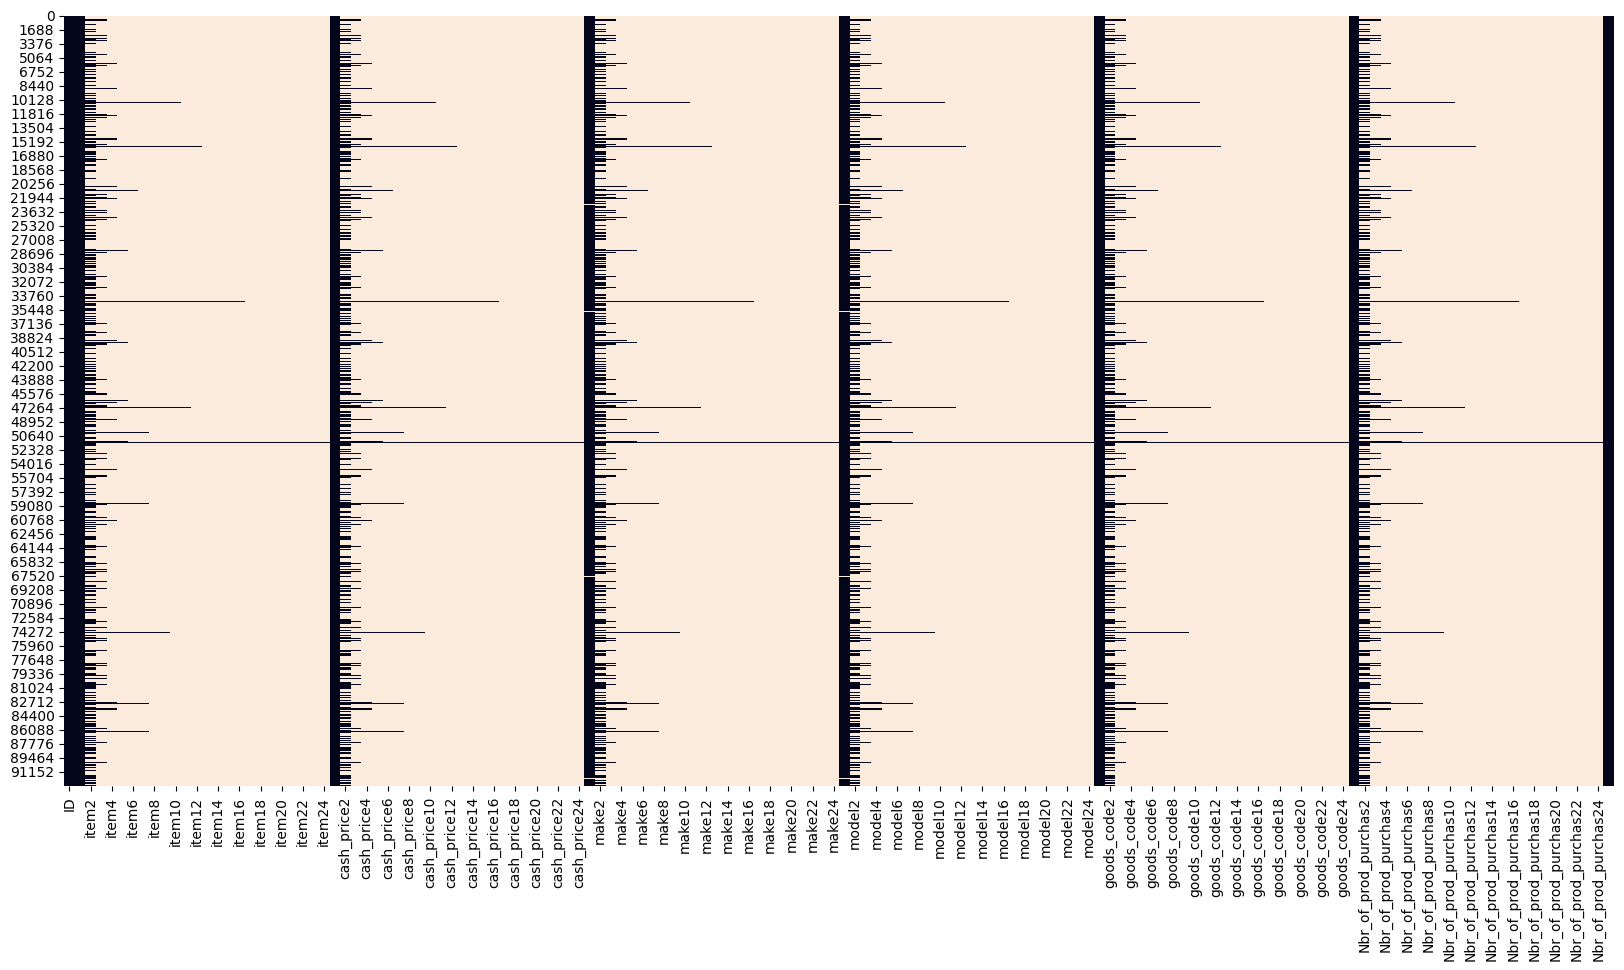

In [7]:
# On visualise la proportion de données manquantes
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Prétraitement des données

### Suppression des colonnes inutiles

In [7]:
def suppression(df):
    # Supprime les colonnes 'goods_code1' à 'goods_code24'
    df = df.drop(columns=[f'goods_code{i}' for i in range(1, 25)])
    # Renvoie le DataFrame modifié
    return df

### Réarrangement des colonnes catégorielles

In [8]:
def rearrangement(df):
    # Sélectionne les colonnes 'cash_price1' à 'cash_price24'
    cols_to_move = df.columns[25:49].copy()
    # Sélectionne l'ensemble des colonnes du DataFrame sans les colonnes 'cash_price1' à 'cash_price24'
    cols_remaining = df.columns.drop(cols_to_move).copy()
    # Redéfinit l'ordre des colonnes en insérant les colonnes 'cash_price1' à 'cash_price24' après 'item', 'make' et 'model'
    new_order = cols_remaining[:73].tolist() + cols_to_move.tolist() + cols_remaining[73:].tolist()
    # Réorganise les colonnes du DataFrame
    df = df[new_order].copy()
    # Renvoie le DataFrame réorganisé
    return df

### Encoding

In [9]:
def label_encoding(df):
    for i in range(1, 73):  # boucle sur les indices de item, make et model
        
        # création du dico1
        if i == 1 or i == 25 or i == 49:  # définit les 'checkpoint' où l'on initialise le dico1
            liste = df.iloc[:, i].unique().tolist()  # création d'une liste avec les catégories uniques de la colonne d'indice i (1, 25 ou 49)
            if np.nan not in liste:   # permet d'ajouter la valeur NaN dans la liste si elle n'y s'y trouvait pas déjà initialement
                liste.append(np.nan)  # ajoute la valeur NaN
            liste.insert(0, liste.pop(liste.index(np.nan)))  # supprime la valeur NaN de la fin pour la mettre au début de la liste, indexé à 0
            dico1 = {v: k for k, v in dict(enumerate(liste)).items()}  # création du dico1 qui stock l'ensemble des catégories uniques de la colonne i (1, 25 ou 49) en valeurs clé avec leur indice associé dans la liste
        
        # mise à jour du dico1 avec les mots du dico2
        liste = df.iloc[:, i].unique()  # création d'une liste avec les catégories uniques de la colonne d'indice i (pour tous les i)
        dico2 = {v: k for k, v in dict(enumerate(liste)).items()}  # création du dico2 qui stock l'ensemble des catégories uniques de la colonne i en valeurs clé avec leur indice associé dans la liste
        mots_a_ajouter = set(dico2.keys()) - set(dico1.keys())  # stock tous les mots à ajouter qui se trouvent dans le dico2 mais pas dans le dico1
        derniere_valeur_d1 = max(dico1.values())  # stock le numéro maximal associé à une catégorie dans le dico1
        for mot in mots_a_ajouter:  # boucle sur la liste des mots à ajouter
            derniere_valeur_d1 += 1  # ajouter 1 au numéro maximal associé à une catégorie 
            dico1.update({mot: derniere_valeur_d1})  # met à jour le dico1 en rajoutant le mot présent dans la liste des mots à ajouter, avec pour valeur correspondante le numéro maximal, permettant de continuer la numérotation dans le dico1
            
        # remplacement des noms des catégories par leur valeur associée dans le dico1
        if i == 24 or i == 48 or i == 72:  # définit les 'checkpoint' à partir desquels on va appliquer le dico1
            for col in df.iloc[:, i-23:i+1]:  # boucle sur les colonnes où l'on va appliquer le dico1
                df[col] = df[col].map(dico1)  # application de la fonction dico1 aux colonnes définies
                
    return df  # renvoie le dataframe encodé

In [10]:
def one_hot_encoding(df): 
    df = pd.get_dummies(df).copy()  # applique la fonction get_dummies au dataframe
    
    selected_columns_item = df.filter(like='item').drop(columns=['Nb_of_items'])  # crée un dataframe contenant toutes les colonnes item sans la colonne 'Nb_of_items'
    selected_columns_make = df.filter(like='make')  # crée un dataframe contenant toutes les colonnes make
    selected_columns_model = df.filter(like='model')  # crée un dataframe contenant toutes les colonnes model
    
    suffixes_item = selected_columns_item.columns.str.split('_').str[1]  # crée un dataframe contenant tous les noms des catégories présentes dans le nom des colonnes de selected_columns_item 
    suffixes_make = selected_columns_make.columns.str.split('_').str[1]  # crée un dataframe contenant tous les noms des catégories présentes dans le nom des colonnes de selected_columns_make
    suffixes_model = selected_columns_model.columns.str.split('_').str[1]  # crée un dataframe contenant tous les noms des catégories présentes dans le nom des colonnes de selected_columns_model
    
    data = pd.DataFrame()  # crée un nouveau dataframe
    
    for ele in suffixes_item:  # boucle sur les noms des items
        data[ele] = selected_columns_item.filter(like=ele).any(axis=1)  # fusionne toutes les colonnes de selected_columns_item qui ont le même nom d'item
    for ele in suffixes_make:  # boucle sur les noms des make
        data[ele] = selected_columns_make.filter(like=ele).any(axis=1)  # fusionne toutes les colonnes de selected_columns_make qui ont le même nom de make
    for ele in suffixes_model:  # boucle sur les noms des model
        data[ele] = selected_columns_model.filter(like=ele).any(axis=1)  # fusionne toutes les colonnes de selected_columns_model qui ont le même nom de model
    
    df = df.iloc[:, :50]  # redéfinit temporairement le dataframe original en ne prenant que les colonnes ID, cash_price, Nbr_of_prod_purchas
    
    df = pd.concat([df, data], axis=1)  # redéfinit le dataframe original en le concaténant avec le dataframe data
    
    return df  # renvoie le dataframe encodé

### Imputation des valeurs manquantes

In [11]:
def imputation(df): 
    df = df.copy()  # crée une copie du dataframe original
    cash_price_columns = [f'cash_price{i}' for i in range(1, 25)]  # stock les colonnes cash_price
    df[cash_price_columns] = df[cash_price_columns].fillna(False)  # remplit toutes les valeurs manquantes des colonnes cash_price avec False
    nbr_of_prod_columns = [f'Nbr_of_prod_purchas{i}' for i in range(1, 25)]  # stock les colonnes Nbr_of_prod_purchas 
    df[nbr_of_prod_columns] = df[nbr_of_prod_columns].fillna(False)   # remplit toutes les valeurs manquantes des colonnes Nbr_of_prod_purchas avec False
    return df  # renvoie le dataframe sans valeur manquante

### Optimisation du dataframe

In [12]:
def optimisation(df):
    # Pour enlever des colonnes sur df
    df.replace(False, np.nan, inplace=True)
    # On va maintenant supprimer les colonnes inutiles (>99%)
    # On enlève les colonnes où 99% ou plus des valeurs sont manquantes
    df = df[df.columns[df.isna().sum() / df.shape[0] < 0.99]]
    df.fillna(False, inplace=True)
    return df

### Preprocessing

In [13]:
def preprocessing(df):
    
    df1 = suppression(df.copy())  # supprimes les colonnes goodscode
    df2 = rearrangement(df1.copy())  # rearrange les colonnes categorielles
    df3 = one_hot_encoding(df2.copy())  # encode le dataframe en labelEncoding ou en OneHotEncoding
    df4 = imputation(df3.copy())  # impute les valeurs manquantes NaN
    df5 = optimisation(df4.copy())
    
    return df5

In [ ]:
df = preprocessing(df)

### Visualisation du dataframe 

In [15]:
df.head()

,ID,cash_price1,cash_price2,cash_price3,cash_price4,cash_price5,cash_price6,Nbr_of_prod_purchas1,Nbr_of_prod_purchas2,Nbr_of_prod_purchas3,Nbr_of_prod_purchas4,Nbr_of_prod_purchas5,Nbr_of_prod_purchas6,Nbr_of_prod_purchas7,Nb_of_items,AUDIO ACCESSORIES,BAGS CARRY CASES,BED LINEN,BEDROOM FURNITURE,CABLES ADAPTERS,COMPUTER PERIPHERALS & ACCESSORIES,COMPUTER PERIPHERALS ACCESSORIES,COMPUTERS,DOOR FURNITURE,LIVING & DINING FURNITURE,LIVING DINING FURNITURE,OUTDOOR FURNITURE,TELEPHONES FAX MACHINES TWO-WAY RADIOS,"TELEPHONES, FAX MACHINES & TWO-WAY RADIOS",TELEVISIONS HOME CINEMA,FULFILMENT CHARGE,SERVICE,WARRANTY,ANYDAY RETAILER,APPLE,LG,RETAILER,SAMSUNG,SONY,2020 APPLE IPAD AIR 10 9,2020 APPLE IPAD AIR 10 9 A14 BIONIC PROCESSOR IOS,2020 APPLE MACBOOK AIR,2020 APPLE MACBOOK AIR 13 3 RETINA DISPLAY M1 PROC,2020 APPLE MACBOOK PRO,2020 APPLE MACBOOK PRO 13,2020 APPLE MACBOOK PRO 13 TOUCH BAR M1 PROCESSOR 8,2021 APPLE IMAC 24 ALL-IN-ONE,2021 APPLE IMAC 24 ALL-IN-ONE M1 PROCESSOR 8GB RA,2021 APPLE IMAC 24 ALL-IN-ONE M1 PROCESSOR 8GB RAM,2021 APPLE IPAD PRO 11,2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI 128G,2021 APPLE IPAD PRO 11 M1 PROCESSOR IOS WI-FI 256G,2021 APPLE IPAD PRO 12 9,2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI 12,2021 APPLE IPAD PRO 12 9 M1 PROCESSOR IOS WI-FI 25,2021 APPLE MACBOOK PRO 14 M1 PRO PROCESSOR 16GB RA,2021 APPLE MACBOOK PRO 16 M1 PRO PROCESSOR 16GB RA,2022 APPLE IPAD AIR 10 9 M1 PROCESSOR IPADOS WI-FI,APPLE IPHONE,APPLE IPHONE 12,APPLE IPHONE 12 PRO,APPLE MAGIC KEYBOARD FOR 12 9 IPAD PRO,APPLE MAGIC KEYBOARD FOR 12 9 IPAD PRO 2021,APPLE MJ1M2ZM A USB-C TO USB ADAPTOR,APPLE PENCIL 2ND GENERATION 2018,APPLE PENCIL 2ND GENERATION 2018 MATTE WHITE,APPLE WATCH SERIES 6,APPLE WATCH SERIES 7 GPS 41MM MIDNIGHT ALUMINIUM C,APPLE WATCH SERIES 7 GPS 41MM STARLIGHT ALUMINIUM,APPLE WATCH SERIES 7 GPS 45MM MIDNIGHT ALUMINIUM C,LG OLED48C14LB 2021 OLED HDR 4K ULTRA HD SMART TV,LG OLED55C14LB 2021 OLED HDR 4K ULTRA HD SMART TV,LG OLED65C14LB 2021 OLED HDR 4K ULTRA HD SMART TV,OLED48C1,OLED55C1,OLED65C1
0,85517,889.0,False,False,False,False,False,1.0,False,False,False,False,False,False,1.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,51113,409.0,False,False,False,False,False,1.0,False,False,False,False,False,False,1.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,83008,1399.0,False,False,False,False,False,1.0,False,False,False,False,False,False,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,78712,689.0,119.0,False,False,False,False,1.0,1.0,False,False,False,False,False,2.0,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,77846,1199.0,False,False,False,False,False,1.0,False,False,False,False,False,False,1.0,False,False,False,False,False,False,False,False,False,False,False,

### Split des données

In [16]:
X = df.copy()  # crée une copie du dataframe
y = data_target_train['fraud_flag']  # affectation de la colonne 'fraud_flag' à y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# On a donc réalise un train test split pour avoir des données y test et évaluer 

### Procédure d'évaluation

In [17]:
def evaluation(model):
    # Entraînement du modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédiction des probabilités des classes positives pour les données de test
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Calcul et affichage du score PR-AUC (aire sous la courbe précision-rappel)
    print("PR-AUC Score:", average_precision_score(y_test, y_scores))
    
    # Affichage de la courbe précision-rappel
    PrecisionRecallDisplay.from_predictions(y_test, y_scores)
    plt.title('Courbe Précision Rappel')
    plt.show()


## Modélisation

In [ ]:
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
logistic_regression = LogisticRegression()

In [ ]:
dict_of_models = {'RandomForest': random_forest,
                  'decisionTree': decision_tree,
                 'LogisticRegression': logistic_regression
                }

RandomForest
PR-AUC Score: 0.20471147024621414


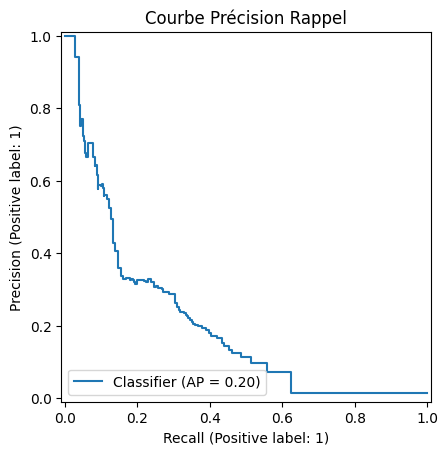

decisionTree
PR-AUC Score: 0.06766716382969945


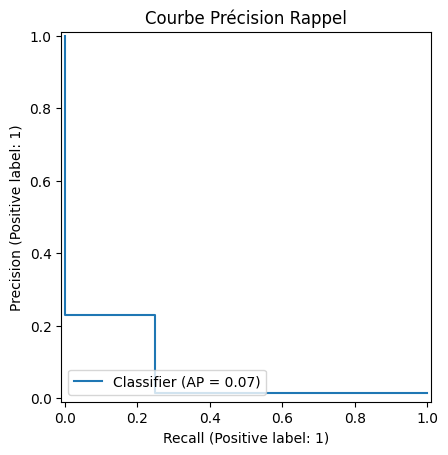

LogisticRegression
PR-AUC Score: 0.011523722877566096


c:\Users\Julien\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


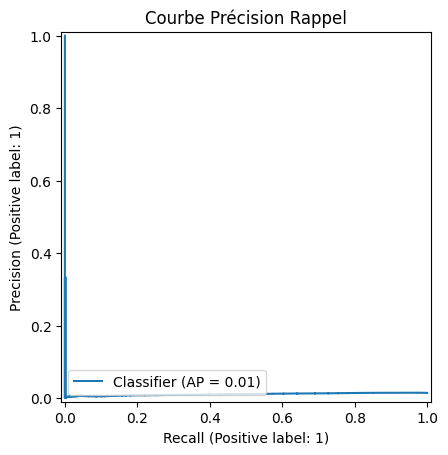

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Optimisation

In [ ]:
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_distributions,
    n_iter=100,
    cv=3,  # Cross Validation avec 3 folds
    verbose=2,
    random_state=42,
    n_jobs=-1, 
    scoring=make_scorer(average_precision_score, needs_proba=True) 
)

random_search.fit(X_train, y_train)

#Voici les paramètres que nous avons obtenu (en 2h environ)
print("Best parameters found: ", random_search.best_params_)
#Best parameters found:  {'n_estimators': 800, 
#                         'min_samples_split': 10, 
#                         'min_samples_leaf': 4, 
#                         'max_features': None, 
#                         'max_depth': 90, 
#                         'class_weight': None, 
#                         'bootstrap': True}

## Création d'un fichier csv pour la soumission

In [ ]:
X_train = preprocessing(data_features_train.copy())
X_test = preprocessing(data_features_test.copy())
y_train = data_target_train['fraud_flag'].copy()

In [ ]:
# Calculer le nombre de valeurs manquantes par ligne
missing_values_per_row = X_train.isna().sum(axis=1)

# Calculer le pourcentage de valeurs manquantes par ligne
percent_missing_per_row = (missing_values_per_row / X_train.shape[1]) * 100

# Afficher les résultats
print(percent_missing_per_row)

On va insérer une étape d'harmonisation des colonnes pour que les features de X_train et X_test soient les mêmes. En effet, comme le One Hot Encoding crée les nouvelles colonnes en fonction des valeurs présentes dans le dataframe, alors si les valeurs présentes dans X_train et X_test sont différentes, alors les deux dataframes n'auront pas les mêmes colonnes. Cela empêcherait donc la prédiction du modèle sur un X_test dont les features sont différentes des features du X_train sur lequel il s'est entraîné.

In [25]:
def harmonize_columns(df1, df2):
    for col in df1.columns:  # Boucle sur les colonnes du dataframe1
        if col not in df2.columns:
            df2[col] = False  # Si une colonne du dataframe1 ne se trouve pas dans le dataframe2, alors on le rajoute et toutes ses valeurs sont égales à False
    df2 = df2[df1.columns]  # Permet d'enlever les colonnes se trouvant dans le dataframe2 mais pas dans le dataframe1

    return df2  # Renvoie le dataframe 2 avec les mêmes colonnes que le dataframe1

X_test = harmonize_columns(X_train, X_test)  # Permet que X_test ait les mêmes colonnes que X_train

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Créer l'instance du modèle avec les paramètres spécifiés
model = GradientBoostingClassifier(
    subsample=0.6,
    n_estimators=500,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=None,
    max_depth=13,
    learning_rate=0.01,
    random_state=42
)

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=90, max_features=None, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=800, random_state=42)

In [ ]:
ID = list(X_test['ID'])  #création d'une liste avec les ID du X_test
index = list (range(len(X_test))) #création d'une liste qui indexe les lignes
csv = pd.DataFrame({'index' : index, 'ID' : ID, 'fraud_flag': model.predict_proba(X_test)[:, 1]}) #création d'un dataframe contenant les trois colonnes : index, ID, fraud_flag
csv.to_csv('C:\\Users\\Cameron\\Desktop\\res.csv',index=False) #convertit le dataframe en fichier csv